# Setup and Load Data

### Import Modules

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

### Set Path

In [2]:
data_dir = 'EyeDiseaseDataset'

In [3]:
os.listdir(data_dir)

['Glaucoma', 'Normal Eye']

In [4]:
for image_class in os.listdir(data_dir):
    print(image_class)

Glaucoma
Normal Eye


In [5]:
img = cv2.imread(os.path.join('EyeDiseaseDataset', 'Glaucoma', 'forward_look (12).jpg'))

In [52]:
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Check Images

In [6]:
def check_images( data_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(data_dir)
    for klass in s_list:
        klass_path=os.path.join (data_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'C:\Users\HP\eyediseasedetection\EyeDiseaseDataset'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  Glaucoma
processing class directory  Normal Eye
improper image files are listed below
C:\Users\HP\eyediseasedetection\EyeDiseaseDataset\Glaucoma\eye.jpg
C:\Users\HP\eyediseasedetection\EyeDiseaseDataset\Glaucoma\glaucoma-attack.jpg


### Load Data

In [7]:
data = tf.keras.utils.image_dataset_from_directory('EyeDiseaseDataset')

Found 310 files belonging to 2 classes.


In [8]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [10]:
batch = data_iterator.next()

# Preprocessed Data

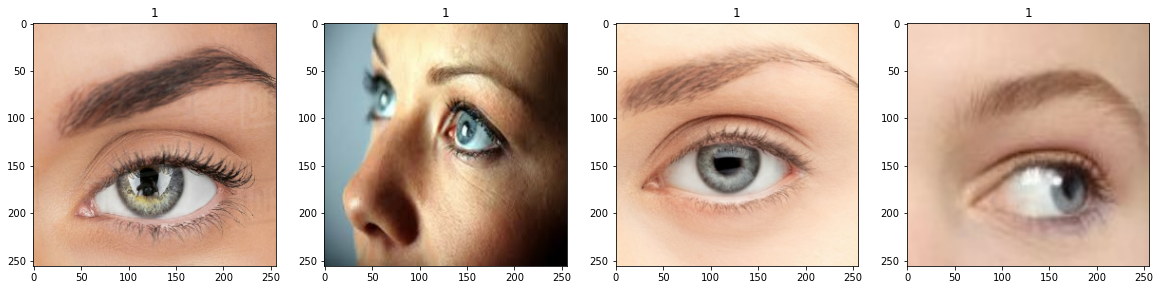

In [11]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x, y:(x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[6.81050837e-01, 6.53599858e-01, 6.22227311e-01],
          [6.81050837e-01, 6.53599858e-01, 6.22227311e-01],
          [6.81050837e-01, 6.53599858e-01, 6.22227311e-01],
          ...,
          [9.78431344e-01, 8.92156839e-01, 8.37254882e-01],
          [9.68627453e-01, 8.82352948e-01, 8.27450991e-01],
          [9.81372535e-01, 8.95098031e-01, 8.40196073e-01]],
 
         [[6.74525142e-01, 6.47074163e-01, 6.15701616e-01],
          [6.74525142e-01, 6.47074163e-01, 6.15701616e-01],
          [6.74525142e-01, 6.47074163e-01, 6.15701616e-01],
          ...,
          [9.82337594e-01, 8.96063089e-01, 8.41161132e-01],
          [9.72533703e-01, 8.86259198e-01, 8.31357241e-01],
          [9.85278785e-01, 8.99004281e-01, 8.44102323e-01]],
 
         [[6.70588255e-01, 6.43137276e-01, 6.11764729e-01],
          [6.70588255e-01, 6.43137276e-01, 6.11764729e-01],
          [6.70588255e-01, 6.43137276e-01, 6.11764729e-01],
          ...,
          [9.85922158e-01, 8.99647653e-01, 8.4474

In [14]:
len(data)

10

### Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
print(len(train))
print(len(val))
print(len(test))

7
2
1


# Deep Model

### Build Deep Learning Model

In [18]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Train

In [21]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [22]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 773ms/step - loss: 1.0917 - accuracy: 0.3795 - val_loss: 0.6912 - val_accuracy: 0.6562
Epoch 2/20
7/7 [==============================] - 6s 734ms/step - loss: 0.6644 - accuracy: 0.6071 - val_loss: 0.6504 - val_accuracy: 0.5625
Epoch 3/20
7/7 [==============================] - 6s 712ms/step - loss: 0.6324 - accuracy: 0.6071 - val_loss: 0.5595 - val_accuracy: 0.6094
Epoch 4/20
7/7 [==============================] - 6s 760ms/step - loss: 0.5829 - accuracy: 0.6920 - val_loss: 0.6292 - val_accuracy: 0.6406
Epoch 5/20
7/7 [==============================] - 6s 735ms/step - loss: 0.4940 - accuracy: 0.7679 - val_loss: 0.4653 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 6s 734ms/step - loss: 0.4975 - accuracy: 0.7143 - val_loss: 0.5022 - val_accuracy: 0.7656
Epoch 7/20
7/7 [==============================] - 6s 737ms/step - loss: 0.5282 - accuracy: 0.7366 - val_loss: 0.4370 - val_accuracy: 0.8281
Epoch 8/20
7/7 [====

In [23]:
hist.history

{'loss': [1.0917189121246338,
  0.6644102334976196,
  0.632389485836029,
  0.5828948020935059,
  0.49397721886634827,
  0.49751806259155273,
  0.528248131275177,
  0.4109640121459961,
  0.355575293302536,
  0.26990771293640137,
  0.23942960798740387,
  0.2222406566143036,
  0.15443746745586395,
  0.19001255929470062,
  0.14492633938789368,
  0.12834377586841583,
  0.12830598652362823,
  0.10912633687257767,
  0.1939331740140915,
  0.13182516396045685],
 'accuracy': [0.3794642984867096,
  0.6071428656578064,
  0.6071428656578064,
  0.6919642686843872,
  0.7678571343421936,
  0.7142857313156128,
  0.7366071343421936,
  0.7991071343421936,
  0.8839285969734192,
  0.8928571343421936,
  0.9017857313156128,
  0.9017857313156128,
  0.9419642686843872,
  0.9285714030265808,
  0.9553571343421936,
  0.9553571343421936,
  0.9464285969734192,
  0.9732142686843872,
  0.9285714030265808,
  0.9464285969734192],
 'val_loss': [0.6911565661430359,
  0.6504136323928833,
  0.5595182180404663,
  0.62921875

# Plot Performance

### Loss

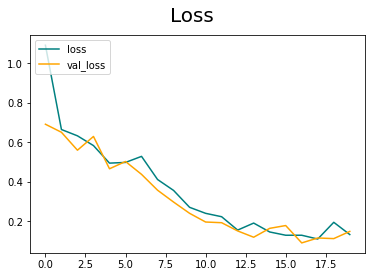

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Accuracy

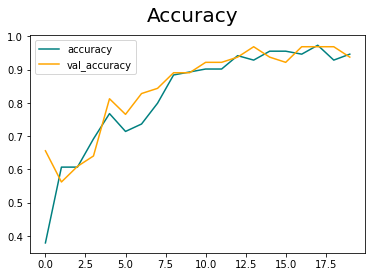

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 194ms/step


In [28]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.8999999761581421, Accuracy:0.9545454382896423


# Test

In [44]:
img = cv2.imread(os.path.join('traindataset', 'Normal Eye', 'images398.jpg'))

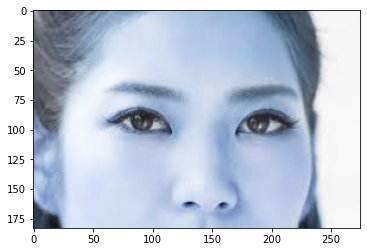

In [45]:
plt.imshow(img)
plt.show()

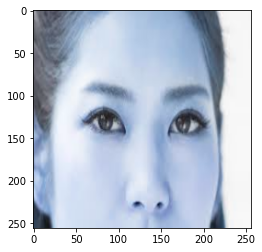

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 38ms/step


In [48]:
yhat

array([[0.86900413]], dtype=float32)

In [49]:
if yhat > 0.5: 
    print(f'Predicted class is Normal Eye')
else:
    print(f'Predicted class is Glaucoma')

Predicted class is Normal Eye


# Save Model

In [36]:
model.save(os.path.join('models','glaucomadetection.h5'))

# Load Model

In [84]:
new_model = load_model('glaucomadetection.h5')

OSError: No file or directory found at glaucomadetection.h5

In [66]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined